<div class="alert-warning" style="font-size:300%">
CS110 Final Assignment
</div>

**NAME** = "Steven H. Yang"

<br/>**COLLABORATOR** = "Daiana Besterekova"

<br/>Minerva University, Fall 2021

## Overall Problem Formulation

Suppose each student submission is a string that is a result of concatenating all the words there (i.e., white spaces are
removed). Let $X$ and $Y$ be two student submission strings. Find all the common substrings of length $k$ (known as
$k$-gram) of the two strings. In other words, determine all $(i,j)$ where $X[i:i+k]=Y[j:j+k]$.
For example, $X=$"today is Monday", $Y=$"day".
All possible $(i,j)$ from these two strings are $(2,0)$ and $(10,0)$ for $k=3$ (“day" appears twice in $X$, and we disregard the
white spaces).

## Question 1 -- Rolling & Double Hashing

### Prompt :
You will build the first implementation to solve the problem stated above. The algorithm is as follows:
- Store all length-k substrings of $X$ into a hash table $T_X$ with the hash values computed by using rolling hashing.
- For each substring $s_y$ in $Y$, compute the hash value h($s_y$) using rolling hashing, and use this hash value to look up $s_y$ in table $T_X$. If the lookup is successful, then we have a common substring.
- You will need to specify $q$ for the hash function $a (mod q)$ in rolling hashing. However, do not worry about fine-tuning $q$—so long as you choose a prime number and provide a justification for why your chosen value of $q$ makes sense with regards to the table size.
- Other design choices should be thoroughly justified, including but not limited to: the hash table’s size, data structures used, and any additional Python functions.
- No external libraries should be used, except for math, random, and numpy.

Demonstrate that your code works as expected by testing it with at least three, non-trivial test cases.

##### Justification of Design Choices

- q value: This will be the size of the hash table. I will have q with the prime number to avoid potential collisions happen. If q is NOT a prime number, the key values will have common factors with q. This means q will hash to the multiples of divisors in mod, collisions happen more likely. Also, it is better to have a large q value which makes the table bigger so it has more room to fit for the characters.

- Data Structure: Hashtables are the data structure that I used in this implementation. It is better than just having an array because I don't know the exact index that I have to look for. An array works well if we know the index of it; however, if I don't know the index of the element that I look for. Having Hashtables will supplement this issue and will make the value findings much easier.


My first implementation is rolling hashing with double hashing. I define two separate class because it helps to debug the code later and make the code more oriented. Having two classes are defined as Nodes and Hash Tables. Inside of the Node class, it only handles the character by character but in Hash Tables class, it handles the Hash Table as a whole.

To insert, ASCII convertor function was created to convert string input to integer. The algorithm behind of this function is followed from "All you need to know for hashing." This implementation uses rolling hashing, which has O(1) time complexity. I chose rolling hashing to reduce the time it takes to get the result which I thought it would be optimal. Since it's "Rolling" it allowed me to calculate the hash value of the next substring based on the current substring that I have. The calculation is not affected by the current substring but it helped me to choose the next substring by eliminating the first character but get the next character.

To search, the algorithm first get the hash value of the substring that it's looking for. The search function will basically find the keys in the table and compare them to see if the keys are present, which will lead the match of substrings.

Even though I choose a large prime number for q, it is still possible to have collisions because of the limited space in the hash tables. To account this problem, I apply double hahsing, which is one of the collision resolution method. Having the second hash function produces coprime to q, it will check the table. If I don't get the coprime of q from this function, I will change the current key with a factor of q that I got from the second hashing. Combining these two hash functions into the double hashing will recheck and avoid the collisions.

As a result of the algorithm, I calculate the plagiarism rate and see the number of collisions.

In [390]:
class HashTableNode:
    def __init__(self, value, index):
        self.value = value
        self.indexes = [index]
        
    def __repr__(self):
        return f"{self.value} => {self.indexes}"
        
    def indexing(self, index):
        """
        Append the index to the indexes for a substring with the same value as the node's value
        Input
        -----
        - int: The index to be inserted
        """
        self.indexes.append(index)
        
        
class HashTableRH:
    def __init__(self, q=9973, d = 10, string = None, k = 3):
        #q is a prime number to avoid potential collisions.
        #9973 is the biggest prime before 10000.
        #Based on the google search, the average length of English Word is 4.5 characters.
        #To be safe, I choose the k-value something smaller than 4.5.
        #As the length of the k-substring value should be less than the input.
        #Therefore, I choose k = 3.
        self.q = q #Table Size
        self.d = d #Base used for ASCII Conversion
        self.hash_table = [None for _ in range(q)] #Empty Hash Table with size of q
        self.len_x = 0 #length of x
        self.len_y = 0 #length of y
        self.collisions = 0 #number of collisions
        self.plagiarism_rate = 0 #plagiarism rate
        if string:
            self.hash_table_insert(string, k)
    def lower_no_special(self, string): 
        """
        Make the input all lower cases and without special characters.  

        Inputs
        --------
        string: str

        Outputs
        --------
        str
        string without upper cases and special characters 

        """ 
        string = string.lower().replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "")\
        .replace("*", "").replace("(", "").replace(")", "").replace('$', "").replace(' ','').replace("-", "")\
        .replace("\n",'').replace("\ufeff",'').replace('\'','').replace("%", "").replace("[", "").replace("]", "")\
        .replace("+", "").replace("=", "").replace("/", "").replace("\"", "").replace("\'", "")

        return string
    
    def hash_function_1(self, key):
        """
        With the division hash function, returns the hash value

        Inputs
        --------
        key: int
            The key needs to be hashed
        Outputs
        --------
        int
            hash value

        """
        return key % self.q
    
    def hash_function_2(self, key):
        """
        With the division hash function, returns the hash value

        Inputs
        --------
        key: int
            The key needs to be hashed
        Outputs
        --------
        int
            hash value

        """
        return key + 1 % (self.q - 1)          
    
    def double_hashing(self, key, i):
        """
        Puts two hashing function together to perform double_hashing

        Inputs
        --------
        key: int
            The key needs to be hashed
        i: int
            Current interation of collision resolution

        Outputs
        --------
        int
            new hash value
        """
        return (self.hash_function_1(key) + i * self.hash_function_2(key)) % self.q
    
    def ascii_convertor(self, string):
        """
        Since Hash function uses integer, change all the characters in ASCII number.

        Inputs
        --------
        string: str

        Outputs
        --------
        ascii_code:int
            converted ASCII code

        """
        ascii_code = 0
        for i in range(len(string)):
            ascii_code += ord(string[i])*self.d**(len(string) - i - 1)
        return ascii_code
    
    def hash_table_insert(self, x, k):
        """
        With a string x, this function helps to insert k-length substrings of x into the hash table
        Input
        -----
        x: str, string needs to be inserted
        Output
        ------
        hash_table: hash table with all the substrings
        """
        m = len(x)
        if m >= k:
            self.len_x = m
            i = 0

            #Get the first substring of x
            substring = x[:k]

            #Get hash value and do double hasing
            h = self.double_hashing(self.ascii_convertor(substring), 0)
            #Store a node with the string at hash table index h
            self.hash_table[h] = HashTableNode(substring, i)
            j = k
            while j < m:
                #Next substring removing the first character and get the next character
                substring = substring[1:] + x[j]
                i += 1

                #Get hash value for newly built substring with rolling hashing
                h = ((h*self.d + self.ascii_convertor(x[j]))%self.q - self.ascii_convertor(x[j - k])*((self.d**k)%self.q))%self.q

                #Insert the substring into the hash table
                self.insert(h, substring, i)
                j += 1
            return self.hash_table
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,x, is too short. Try longer word or greater k.')
    
    def hash_table_search(self, y, k):
        """
        This function searches all the possible k-length substrings of input y in the hash table and return matches found
        Input
        -----
        y: str, the string needs to be searched
        
        Output
        ------
        array: list of all the tuples that has matches
        """
        n = len(y)
        if n >= k:
            self.len_y = n
            matches = 0
            i = 0
            
            #Open an emptry array
            array = []
            
            #Get the first substring of x
            substring = y[:k]
            #Get hash value and do double hasing
            h_y = self.double_hashing(self.ascii_convertor(substring), 0)
            #Search the table
            results = self.search(h_y, substring, i)
            if results:
                #If there's a match, count it and store it in the array
                matches += 1
                for result in results:
                    array.append(result)
            j = k
            while j < n:
                #Next substring removing the first character and get the next character
                substring = substring[1:] + y[j]
                i += 1
                #Get hash value for newly built substring with rolling hashing
                h_y = ((h_y*self.d + self.ascii_convertor(y[j]))%self.q - self.ascii_convertor(y[j - k])*((self.d**k)%self.q))%self.q
                #Search the table
                results = self.search(h_y, substring, i)
                if results:
                    #If there's a match, count it and store it in the array
                    matches += 1
                    for result in results:
                        array.append(result)
                j += 1
            print("Found", matches, "matches")
            
            #Calculate the plagiarism rate
            self.plagiarism_rate = (2*matches)/(self.len_x - k + 1 + self.len_y - k + 1)*100
            return array
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,y, is too short. Try longer word or greater k.')
        
    def insert(self, key, value, index):
        """
        This function inserts key in the table which will resolve the collisions
        Input
        -----
        key: int, key value to be inserted
        value: Substring value that key holds
        index: Position of the substring
        
        Output
        ------
        None
        """
        j = 0
        while j < self.q:
            #Double Hashing to find hash value with the key to resolve collision
            dh = self.double_hashing(key, j)
            if self.hash_table[dh] is None:
                #Get the empty position and insert it there
                self.hash_table[dh] = HashTableNode(value, index)
                return
            if self.hash_table[dh].value == value:
                #Assign the index
                self.hash_table[dh].indexing(index)
                return
            if j == 0:
                #Count the collisions
                self.collisions += 1
            j += 1
    
    def search(self, key, value, index):
        """
        Looks up the key by searching the table
        Input
        -----
        key: int, key value to be inserted
        value: Substring value that key holds
        index: Position of the substring
        
        Output
        ------
        bool: boolean value. False if there's no match
        list: list, the list includes the positions of match
        """
        i = 0
        while i < self.q:
            #Use double hashing to find a key in the hash table
            h_y = self.double_hashing(key, i)
            if self.hash_table[h_y] is None:
                #Empty table means no key.
                return False
            if self.hash_table[h_y].value == value:
                #If there's a match, put them in array and return it
                return [(i, index) for i in self.hash_table[h_y].indexes]
            i += 1
        return False

In [391]:
#Before moving on, checking ASCII Convertor works correctly:
def ascii_convertor_test(string,d):
    """
    Make the input all lower cases and without special characters.  

    Inputs
    --------
    string: str

    Outputs
    --------
    str
    string without upper cases and special characters 

    """
    ascii_code = 0
    for i in range(len(string)):
        ascii_code += ord(string[i])*d**(len(string) - i - 1)
    return ascii_code
test_value1 = ord('e')*10**0 + ord('n')*10**1 + ord('o')*10**2 + ord('h')*10**3 + ord('p')*10**4 + ord('i')*10**5
assert ascii_convertor_test('iphone',10) == test_value1
test_value2 = ord('e')*5**0 + ord('n')*5**1 + ord('o')*5**2 + ord('h')*5**3 + ord('p')*5**4 + ord('i')*5**5
assert ascii_convertor_test('iphone',5) == test_value2
test_value3 = ord('k')*10**0 + ord('s')*10**1 + ord('a')*10**2 + ord('m')*10**3
assert ascii_convertor_test('mask',10) == test_value3
test_value4 = ord('p')*3**0 + ord('o')*3**1 + ord('t')*3**2 + ord('p')*3**3 + ord('a')*3**4 + ord('l')*3**5
assert ascii_convertor_test('laptop',3) == test_value4

Based on the google search, the average length of English Word is 4.5 characters. To be safe, I choose the k-value something smaller than 4.5 as the length of the k-substring value should be less than the input.

Therefore, for test cases, I choose k = 3.

In [392]:
def rh_get_match(x, y, k):
    """
    Get all the matches of substrings with rolling hashing
    Input
    -----
    x, y: str, input strings to be tested
    k: int, length of the substring
    
    Output
    ------
    A list of tuples where there are matches
    """
    ## your code here
    x = HashTableRH.lower_no_special(self = None, string = x)
    y = HashTableRH.lower_no_special(self = None, string = y)
    #print(x)
    #print(y) 
    if len(x) < k or len(y) < k:
        raise ValueError('The word you are testing is too short. Try longer word or greater k.')
    table = HashTableRH(string = x, k = k)
    print(table.hash_table_search(y, k))
    print(table.len_x, table.len_y)
    return print('Plagiarism rate is:', table.plagiarism_rate,'%')
def rh_get_match_test(x, y, k):
    """
    Basically the same function like above but not printing collisions or plagiarism percentage.
    So it can be used for assert later.
    """
    ## your code here
    x = HashTableRH.lower_no_special(self = None, string = x)
    y = HashTableRH.lower_no_special(self = None, string = y)
    #print(x)
    #print(y)
    if len(x) < k or len(y) < k:
        raise ValueError('The word you are testing is too short.')
    table = HashTableRH(string = x, k = k)
    return table.hash_table_search(y, k)

In [393]:
#Test Case 1
#This case shows when the input is too small, that is smaller than the length of the k-substring.
#This should raise an error!
rh_get_match("hi"
             ,
             "Hi"
             , 3)

ValueError: The word you are testing is too short. Try longer word or greater k.

In [395]:
#Test Case 2
#This case tests same characters but with different lower/upper cases.
rh_get_match("Steven"
             ,
             "sTeVen"
             , 3)
assert rh_get_match_test('Steven','sTeVen',3) == [(0, 0), (1, 1), (2, 2), (3, 3)]

Found 4 matches
[(0, 0), (1, 1), (2, 2), (3, 3)]
6 6
Plagiarism rate is: 100.0 %
Found 4 matches


In [396]:
#Test Case 3
#This case tests when there's no plagiarism at all.
rh_get_match("Steven"
             ,
             "Diane"
             , 3)
assert rh_get_match_test("Steven","Diane",3) == []

Found 0 matches
[]
6 5
Plagiarism rate is: 0.0 %
Found 0 matches


In [397]:
#Test Case 4
#This test case finds pharaphrased sentences.
rh_get_match("Steven had a breakfast"
             ,
             "Steven will have a breakfast"
             , 3)
assert rh_get_match_test("Steven had a breakfast","Steven will have a breakfast",3) == [(0, 0), (1, 1), (2, 2), 
    (3, 3), (9, 14), (10, 15), (11, 16), (12, 17), (13, 18), (14, 19), (15, 20), (16, 21)]

Found 12 matches
[(0, 0), (1, 1), (2, 2), (3, 3), (9, 14), (10, 15), (11, 16), (12, 17), (13, 18), (14, 19), (15, 20), (16, 21)]
19 24
Plagiarism rate is: 61.53846153846154 %
Found 12 matches


In [398]:
#Test Case 5
#This test case tests the repetition of the word.
rh_get_match("newer computer calculates faster than old computers"
             ,
             "computer"
             , 3)

assert rh_get_match_test("newer computer calculates faster than old computers","computer", 3) == [(5, 0),
        (36, 0), (6, 1), (37, 1), (7, 2), (38, 2), (8, 3),
        (39, 3), (9, 4), (40, 4), (10, 5), (26, 5), (41, 5)]

Found 6 matches
[(5, 0), (36, 0), (6, 1), (37, 1), (7, 2), (38, 2), (8, 3), (39, 3), (9, 4), (40, 4), (10, 5), (26, 5), (41, 5)]
45 8
Plagiarism rate is: 24.489795918367346 %
Found 6 matches


In [399]:
#Test Case 6
#This test case detects pharaphrasing but used most of the original sentence, only changing the key words.
#Got the test sentences from:
#https://resources.library.lemoyne.edu/guides/academicintegrity/example-plagiarism
rh_get_match("Here are some examples of Plagiarism: Turning in someone else's work as your own. Copying large pieces of text from a source without citing that source"
             ,
             "These are examples of Plagiarism: Turning in other's work like yours. Copying texts from sources without any citation"
             , 3)
assert rh_get_match_test("Here are some examples of Plagiarism: Turning in someone else's work as your own. Copying large pieces of text from a source without citing that source"
             ,
             "These are examples of Plagiarism: Turning in other's work like yours. Copying texts from sources without any citation"
             , 3) == [(3, 4), (4, 5), (10, 7), (11, 8), (12, 9), (13, 10), (14, 11), (15, 12), (16, 13),
                      (6, 14), (17, 14), (82, 14), (18, 15), (83, 15), (19, 16), (20, 17), (21, 18),
                      (22, 19), (23, 20), (24, 21), (25, 22), (26, 23), (27, 24), (28, 25), (29, 26),
                      (30, 27), (31, 28), (32, 29), (33, 30), (34, 31), (35, 32), (36, 33), (70, 33),
                      (111, 33), (37, 34), (38, 35), (0, 40), (52, 43), (53, 44), (54, 45), (59, 52),
                      (60, 53), (96, 53), (119, 53), (66, 57), (67, 58), (68, 59), (69, 60), (36, 61),
                      (70, 61), (111, 61), (112, 62), (86, 64), (87, 65), (90, 69), (91, 70), (95, 73),
                      (118, 73), (60, 74), (96, 74), (119, 74), (97, 75), (120, 75), (98, 76), (121, 76),
                      (81, 77), (51, 78), (101, 80), (102, 81), (103, 82), (104, 83), (105, 84), (108, 90)]

Found 59 matches
[(3, 4), (4, 5), (10, 7), (11, 8), (12, 9), (13, 10), (14, 11), (15, 12), (16, 13), (6, 14), (17, 14), (82, 14), (18, 15), (83, 15), (19, 16), (20, 17), (21, 18), (22, 19), (23, 20), (24, 21), (25, 22), (26, 23), (27, 24), (28, 25), (29, 26), (30, 27), (31, 28), (32, 29), (33, 30), (34, 31), (35, 32), (36, 33), (70, 33), (111, 33), (37, 34), (38, 35), (0, 40), (52, 43), (53, 44), (54, 45), (59, 52), (60, 53), (96, 53), (119, 53), (66, 57), (67, 58), (68, 59), (69, 60), (36, 61), (70, 61), (111, 61), (112, 62), (86, 64), (87, 65), (90, 69), (91, 70), (95, 73), (118, 73), (60, 74), (96, 74), (119, 74), (97, 75), (120, 75), (98, 76), (121, 76), (81, 77), (51, 78), (101, 80), (102, 81), (103, 82), (104, 83), (105, 84), (108, 90)]
124 98
Plagiarism rate is: 54.12844036697248 %
Found 59 matches


##### But why are we using prime numbers as our q? And what happens with the bigger q?

Having a prime number as q in this algorithm will avoid collisions and distribute the hash values evenly throughout the hash table. If q is NOT a prime, it may share a common factor which potentially hash values into an index that shares the factors -- collision happen.

Also, as you can see in the graph below, the bigger q results less collisions because it gives more spaces in hash table.

In [400]:
import math
def prime_list(a, b):
    '''
    Returns a list of primes between a and b inclusive
    Input
    ------
    a, b: bounds for the list

    Output
    ------
    A list of all the prime_lst between a and b
    '''
    prime_lst = []
    for i in range(a, b + 1):
        if i > 1:
            for j in range(2, math.floor(i**0.5)+1):    
                if (i%j) == 0: 
                    break 
            else: 
                prime_lst.append(i)
    return prime_lst

In [401]:
import random 
def random_input_generator(n):
    """
    Makes the random string of length n
    Input
    -----
    n: int, length of the string
    
    Output
    ------
    string: str, A random string of length n
    """
    letters = 'abcdefghijklmnopqrstuvwxyz'
    string = ''.join((random.choice(letters) for _ in range(n)))
    return string

In [402]:
def prime_collisions(n, k, primes):
    '''
    Get the average number of collisions depending on q
    Input
    ------
    n: int, the length of the string
    k: int, the length of substring
    primes: The list of prime numbers that will be used for q
    
    Output
    ------
    prime_colision: lst, a list of average collisions with q
    '''
    prime_colision = []
    for i in primes:
        collisions = []
        for j in range(100):
            x = random_input_generator(n)
            table = HashTableRH(q=i, k = k)
            table.hash_table_insert(x, k)
            collisions.append(table.collisions)
        prime_colision.append(sum(collisions)/len(collisions))
    return prime_coll

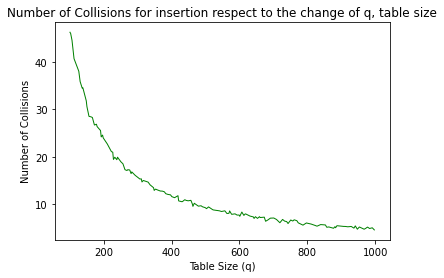

In [403]:
import matplotlib.pyplot as plt
n = 500
k = 3
a = 100
b = 1000
n = a
primes = prime_list(a, b)
prime_collision = prime_collisions(n, k, primes)
plt.plot(primes, prime_collision, color = 'green', linewidth = 1.0)
plt.xlabel('Table Size (q)')
plt.ylabel('Number of Collisions')
plt.title('Number of Collisions for insertion respect to the change of q, table size')
plt.show()

I see there are less collisions with the larger number of q.

##### Bonus: I was wondering how change in q affects the complexity of the algorithm itself. This part will be discussed later in this paper.

## Question 2 -- Multiplicative Hashing

### Prompt :
You will now work on the second version of this algorithm:
- Store all length-$k$ substrings of $X$ into a hash table $T_X$, using a hash function that does not entail the division method.
- For each substring $s_y$ in $Y$, compute the hash value $h(s_y)$ and use this hash value to look up $s_y$ in table $T_X$. 

If the lookup is successful, then we have a common substring. 
Note that using a hash function that does not entail the division method prohibits the use of rolling hashing. 
Asymptotically speaking, we are essentially taking more time for computing hash values in this version.
However, we are now free to choose a more fancy function, so there is a tradeoff here.
- Provide a string reflection on what makes a good hash function. Run an experiment to give empirical evidence to support your choice for the hash function.
- Implement the second version of the algorithm described above using the template below. Make sure
to:
 - Justify any design choices (the hash function, the hash table’s size, the data structures used, and any additionally built Python functions).
 - Write clean and well-structured code, making use of PEP 8 coding conventions. Because this version only differs from the one in question 1 in how the hash values are computed, try to organize your code in a clear way that reutilizes as much functionality as the one you have already provided code for (for example, consider adding the hashing method either as a positional argument or as a method of choice if you wrap your code in a Python class).
 - No external libraries should be used, except for the math, random, and numpy modules.
- Illustrate how your code works by giving an explicit example. Further, implement at least three test cases to make sure your code works as expected. 

##### What makes a good hashing?

Simple. Good hashing is basically you want to distribute your inputs into the hash table very evenly. This will help you to achieve O(1) time complexity. However, you also want to avoid having too many functions with so many operations because it will eventually increate the time complexity -- which is not quite good for the algorithms.

For example, the above implementation was a good hashing as long as it has chosen the right values such as q, table size, and second hashing function that makes the double hashing to minimize the number of collisions.

The second version of implementation aims to be a good hashing to by reducing the dependency from so many variabls to consider from the first implementation, having less collisions and reduce the time complexity.

In this version of implementation, I will implement without the division method which includes any mod methods. As there are no division methods, double hashing cannot be used; therefore the second hash function is not required too. To avoid collisions, chaining is used here. Instead of having two separate hashtables to compare, I have one big hashtable here to implement the algorithm. The basic structure of the code and idea are similar with the first implementation.

Key differences in this implementation compared to the first implementation:

Having all substrings in the same hashvalue under the hashtable's index. Hash function is also slightly different.  Instead of using the mod of the key, multiply the key by the fractional constant, c. I expect to have a fraction and take that fraction out and scale the tablesize with the fractional part.

This implementation is called multiplicative hashing. Unlike from the first implementation, it does not take the mod of the key but instead I multiply the key with the fractional constant (Knuth, 1998). For c, Knuth suggested the c value as (sqrt(5)-1)/2 so I adapt this to use in this implementation.

Likely with the first implementation, this algorithm will return the plagiarism rate and the number of collisions at the end.

##### Justification of Design Choices

- q value: This will be the size of the hash table. I will have q with the prime number to avoid potential collisions happen. If q is NOT a prime number, the key values will have common factors with q. This means q will hash to the multiples of divisors in mod, collisions happen more likely. Also, it is better to have a large q value which makes the table bigger so it has more room to fit for the characters.

- d value(base): In this approach, I avoid division method which is mod. From question 1, I used rolling and double hashing which includes mod; therefore, in this approach, I avoid using those two. That being said, I need a bigger hash table here to avoid collisions because I cannot use double hashing here. As there are 26 characters in English, I create a hash function with base of 26. For example in the next code cell, as you can see in the next cell, if I have base of 10, there is a potential collision. However, as you can see in the second example, if I have base of 26, I can avoid this collision.

- Data Structure: Hashtables without any division meethods are the data structure that I used in this implementation. It is better than just having an array because I don't know the exact index that I have to look for. An array works well if we know the index of it; however, if I don't know the index of the element that I look for. Having Hashtables will supplement this issue and will make the value findings much easier.


In [404]:
#Proof of why base 10 is not enough in this case.
def ascii_convertor_test(string,d):
        ascii_code = 0
        for i in range(len(string)):
            ascii_code += ord(string[i])*d**(len(string) - i - 1)
        return ascii_code

print('Example of Base 10')
print(ascii_convertor_test('abc',10),ascii_convertor_test('aam',10))
print('Example of Base 26')
print(ascii_convertor_test('abc',26),ascii_convertor_test('aam',26))

Example of Base 10
10779 10779
Example of Base 26
68219 68203


In [405]:
import math
class MultiHashing:
    def __init__(self, q=9973, c = (5**0.5 - 1)/2, d=26, string = None, k = 3):
        self.q = q #Table Size
        self.d = d #Base of ASCII
        self.c = c #Constant for Multiplicative Hashing
        self.len_x = 0
        self.len_y = 0
        #Create a hash table
        self.hash_table = [[] for _ in range(q)]
        self.collisions = 0 #Number of Collisions
        self.plagiarism_rate = 0 #Plagiarism Rate
        
        if string:
            #If there is a string, insert it to the hash table
            self.hash_table_insert(string, k)
    
    def hash_function(self, key):
        """
        Get the hash value of key with the multiplicative hash function
        Input
        -----
        key: int, the key value needs to be hashed
        
        Output
        ------
            A hash value of the key
        """
        return math.floor(self.q*((key*self.c)-math.floor(key*self.c)))
    
    def set_q(self, large):
        """
        Generate the larger power of 2
        Input
        -----
        large: int, the number I have to get next largest power of 2
        
        Output
        ------
            The next largest power of two
        """
        return 2**math.ceil(math.log(large, 2))
    
    def ascii_convertor(self, string):
        """
        Since Hash function uses integer, change all the characters in ASCII number.

        Inputs
        --------
        string: str

        Outputs
        --------
        ascii_code:int
            converted ASCII code

        """
        ascii_code = 0
        for i in range(len(string)):
            ascii_code += ord(string[i])*self.d**(len(string) - i - 1)
        return ascii_code
    
    def lower_no_special(self, string): 
        """
        Make the input all lower cases and without special characters.  

        Inputs
        --------
        string: str

        Outputs
        --------
        str
        string without upper cases and special characters 

        """ 
        string = string.lower().replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "")\
        .replace("*", "").replace("(", "").replace(")", "").replace('$', "").replace(' ','').replace("-", "")\
        .replace("\n",'').replace("\ufeff",'').replace('\'','').replace("%", "").replace("[", "").replace("]", "")\
        .replace("+", "").replace("=", "").replace("/", "").replace("\"", "").replace("\'", "")

        return string
    
    def hash_table_insert(self, x, k):
        """
        With a string x, this function helps to insert k-length substrings of x into the hash table
        Input
        -----
        x: str, string needs to be inserted
        Output
        ------
        hash_table: hash table with all the substrings
        """
        m = len(x)
        if m >= k:
            self.len_x = m
            i = 0
            #Get the first substring of x
            substring = x[:k]

            #Get hash value and do double hasing
            h = self.hash_function(self.ascii_convertor(substring))
            #Store a node with the string at hash table index h
            self.hash_table[h].append(HashTableNode(substring, i))
            j = k
            while j < m:
                #Next substring removing the first character and get the next character
                substring = substring[1:] + x[j]
                i += 1

                #Get hash value for newly built substring with rolling hashing
                h = self.hash_function(self.ascii_convertor(substring))

                #Insert the substring into the hash table
                if len(self.hash_table[h]) > 0:
                    self.collisions += 1
                self.hash_table[h].append(HashTableNode(substring, i))
                j += 1
            return self.hash_table
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,x, is too short. Try longer word or greater k.')
        

    
    def hash_table_search(self, y, k):
        """
        This function searches all the possible k-length substrings of input y in the hash table and return matches found
        Input
        -----
        y: str, the string needs to be searched
        
        Output
        ------
        array: list of all the tuples that has matches
        """
        n = len(y)
        if n >= k:
            self.len_y = n
            matches = 0
            i = 0
            
            #Open an emptry array
            array = []
            
            #Get the first substring of x
            substring = y[:k]
            #Get hash value and do double hasing
            h_y = self.hash_function(self.ascii_convertor(substring))
            #Search the table
            results = self.search(h_y, substring, i)
            if results:
                #If there's a match, count it and store it in the array
                matches += 1
                for result in results:
                    array.append(result)
            j = k
            while j < n:
                #Obtain the substring from the previous substring by removing the first character and adding the next one
                substring = substring[1:] + y[j]
                i += 1
                #Compute h_y for the new substring with the hashing function (without rolling hashing)
                h_y = self.hash_function(self.ascii_convertor(substring))
                #Call self.search to search the table for the substring (and account for possible collisions)
                results = self.search(h_y, substring, i)
                if results:
                    #If we find a match, we increase the number of matches and add the results to the array.
                    matches += 1
                    for result in results:
                        array.append(result)
                j += 1
            print("Found", matches, "matches")
            
            #Calculate the plagiarism rate
            self.plagiarism_rate = (2*matches)/(self.len_x - k + 1 + self.len_y - k + 1)*100
            return array
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,y, is too short. Try longer word or greater k.')
        
    
    def search(self, key, value, index):
        """
        Looks up the key by searching the table
        Input
        -----
        key: int, key value to be inserted
        value: Substring value that key holds
        index: Position of the substring
        
        Output
        ------
        bool: boolean value. False if there's no match
        list: list, the list includes the positions of match
        """
        if self.hash_table[key] is None:
            #Empty table means no key.
            return False
        array = []
        for i in self.hash_table[key]:
            if i.value == value:
                #If there's a match, put them in array and return it
                array.append((i.indexes[0], index))
        return array

In [406]:
def multi_get_match(x, y, k):
    """
    Find common substrings of inputs withOUT rolling hashing.
    Input
    -----
    x, y: str, input strings
    k: int, length of substring
    
    Output
    ------
        A list of tuples with matches
    """
    
    #Get a hash table with size of k
    table = MultiHashing(k = k)
    
    #Eliminates the special characters and lower the cases
    x, y = table.lower_no_special(x), table.lower_no_special(y)
    
    #Insert the substrings of x into the table
    table.hash_table_insert(x, k)
    
    #Get the lists of common sub strings from hash table
    common_substrings = table.hash_table_search(y, k)
    
    print("Collisions:", table.collisions)
    print("{:0.2f}% plagiarism detected\n".format(table.plagiarism_rate))
    
    return common_substrings

def multi_get_match_test(x, y, k):
    """
    Basically the same function like above but not printing collisions or plagiarism percentage.
    So it can be used for assert.
    """
    #Get a hash table with size of k
    table = MultiHashing(k = k)
    
    #Eliminates the special characters and lower the cases
    x, y = table.lower_no_special(x), table.lower_no_special(y)
    
    #Insert the substrings of x into the table
    table.hash_table_insert(x, k)
    
    #Get the lists of common sub strings from hash table
    common_substrings = table.hash_table_search(y, k)
    
    return common_substrings

Below cases are changing q value. It is just for an experiment to see how different values of q will affect the multiplication.

In [407]:
def multi_get_match_test2(x, y, k):
    """
    Basically the same function like above but not printing collisions or plagiarism percentage.
    So it can be used for assert.
    """
    #Get a hash table with size of k
    table = MultiHashing(k = k, q = 4057)
    
    #Eliminates the special characters and lower the cases
    x, y = table.lower_no_special(x), table.lower_no_special(y)
    
    #Insert the substrings of x into the table
    table.hash_table_insert(x, k)
    
    #Get the lists of common sub strings from hash table
    common_substrings = table.hash_table_search(y, k)
    
    return common_substrings

def multi_get_match_test3(x, y, k):
    """
    Basically the same function like above but not printing collisions or plagiarism percentage.
    So it can be used for assert.
    """
    #Get a hash table with size of k
    table = MultiHashing(k = k, q = 1373)
    
    #Eliminates the special characters and lower the cases
    x, y = table.lower_no_special(x), table.lower_no_special(y)
    
    #Insert the substrings of x into the table
    table.hash_table_insert(x, k)
    
    #Get the lists of common sub strings from hash table
    common_substrings = table.hash_table_search(y, k)
    
    return common_substrings

def multi_get_match_test4(x, y, k):
    """
    Basically the same function like above but not printing collisions or plagiarism percentage.
    So it can be used for assert.
    """
    #Get a hash table with size of k
    table = MultiHashing(k = k, q = 71)
    
    #Eliminates the special characters and lower the cases
    x, y = table.lower_no_special(x), table.lower_no_special(y)
    
    #Insert the substrings of x into the table
    table.hash_table_insert(x, k)
    
    #Get the lists of common sub strings from hash table
    common_substrings = table.hash_table_search(y, k)
    
    return common_substrings

In [408]:
#Test Case 1
#This case shows when the input is too small, that is smaller than the length of the k-substring.
#This should raise an error!
multi_get_match("hi"
             ,
             "Hi"
             , 3)

ValueError: The word you are testing,x, is too short. Try longer word or greater k.

In [409]:
#Test Case 2
#This case tests same characters but with different lower/upper cases.
multi_get_match("Steven"
             ,
             "sTeVen"
             , 3)
assert multi_get_match_test('Steven','sTeVen',3) == [(0, 0), (1, 1), (2, 2), (3, 3)]

Found 4 matches
Collisions: 0
100.00% plagiarism detected

Found 4 matches


In [410]:
#Test Case 3
#This case tests when there's no plagiarism at all.
multi_get_match("Steven"
             ,
             "Diane"
             , 3)
assert multi_get_match("Steven","Diane",3) == []

Found 0 matches
Collisions: 0
0.00% plagiarism detected

Found 0 matches
Collisions: 0
0.00% plagiarism detected



In [411]:
#Test Case 4
#This test case finds pharaphrased sentences.
multi_get_match("Steven had a breakfast"
             ,
             "Steven will have a breakfast"
             , 3)
assert multi_get_match("Steven had a breakfast","Steven will have a breakfast",3) == [(0, 0), (1, 1), (2, 2), 
    (3, 3), (9, 14), (10, 15), (11, 16), (12, 17), (13, 18), (14, 19), (15, 20), (16, 21)]

Found 12 matches
Collisions: 0
61.54% plagiarism detected

Found 12 matches
Collisions: 0
61.54% plagiarism detected



In [412]:
#Test Case 5
#This test case tests the repetition of the word.
multi_get_match("newer computer calculates faster than old computers"
             ,
             "computer"
             , 3)

assert multi_get_match("newer computer calculates faster than old computers","computer", 3) == [(5, 0),
        (36, 0), (6, 1), (37, 1), (7, 2), (38, 2), (8, 3),
        (39, 3), (9, 4), (40, 4), (10, 5), (26, 5), (41, 5)]

Found 6 matches
Collisions: 8
24.49% plagiarism detected

Found 6 matches
Collisions: 8
24.49% plagiarism detected



In [413]:
#Test Case 6
#This test case detects pharaphrasing but used most of the original sentence, only changing the key words.
#Got the test sentences from:
#https://resources.library.lemoyne.edu/guides/academicintegrity/example-plagiarism
multi_get_match("Here are some examples of Plagiarism: Turning in someone else's work as your own. Copying large pieces of text from a source without citing that source"
             ,
             "These are examples of Plagiarism: Turning in other's work like yours. Copying texts from sources without any citation"
             , 3)

assert multi_get_match_test("Here are some examples of Plagiarism: Turning in someone else's work as your own. Copying large pieces of text from a source without citing that source"
             ,
             "These are examples of Plagiarism: Turning in other's work like yours. Copying texts from sources without any citation"
             , 3) == [(3, 4), (4, 5), (10, 7), (11, 8), (12, 9), (13, 10), (14, 11), (15, 12),
                      (16, 13), (6, 14), (17, 14), (82, 14), (18, 15), (83, 15), (19, 16), (20, 17),
                      (21, 18), (22, 19), (23, 20), (24, 21), (25, 22), (26, 23), (27, 24), (28, 25),
                      (29, 26), (30, 27), (31, 28), (32, 29), (33, 30), (34, 31), (35, 32), (36, 33),
                      (70, 33), (111, 33), (37, 34), (38, 35), (0, 40), (52, 43), (53, 44), (54, 45),
                      (59, 52), (60, 53), (96, 53), (119, 53), (66, 57), (67, 58), (68, 59), (69, 60),
                      (36, 61), (70, 61), (111, 61), (112, 62), (86, 64), (87, 65), (90, 69), (91, 70),
                      (95, 73), (118, 73), (60, 74), (96, 74), (119, 74), (97, 75), (120, 75), (98, 76),
                      (121, 76), (81, 77), (51, 78), (101, 80), (102, 81), (103, 82), (104, 83), (105, 84),
                      (108, 90)]

Found 59 matches
Collisions: 12
54.13% plagiarism detected

Found 59 matches


## Question 3
### Prompt:
Carefully describe how you would use the code above to investigate the extent of plagiarism. Enumerate potential pitfalls and challenges of applying this algorithm for real-life use (you can also compare both of these algorithms with a more brute-force approach to plagiarism detection; if you do this, make sure to describe how such approach would work and why it wouldn’t be very appealing from a computational standpoint). Make sure you justify all the assumptions you make.

Comparing two implementations above, I'd still choose the first implementation which includes rolling and double hashing. As mentioned in "All you need to know about Hashing", having two different hash functions make it's very a lot less likely to have clustering. This is because values everytime will change differently following two hash functions, resulting in identifications of different slots in hash table. The reading still highlighted that this might not work in this way unless the key is exactly the same but this is very unlikely to happen.

The first implementation is much better in computational wise and therefore it supports the reason I should choose the first implementation. The detailed complexity analysis is included in question 4.

Still this proves hashing in general is much better than brute force approach. Brute force may be easy to think as it just compares all sub string by sub string but the thing is this will take dramatic time. Think about the case that you have to string inputs want to test have length of m and n respectively. As it goes through over and over it, it will take O(m*n) However in hash table data structure and hashing, it will take O(m) + O(n) = O(m+n), because it check separately but check the matching after, not likely checking and matching simultaneously like brute force. Plus O(1) for insertion and searching but this is not that critical downside. This makes the behavior still linear but much faster than brute force approach.

I think I can use this plagiarism detector for my future assignments. For example, when I am writing an essay, I do refer sources a lot but try my best to rephrase and understand it. In this process, I sometimes copy the sentence but how can I tell my pharaphrasing is enough? If I have this algorithm, I can compare how much similar they are so I can think of I need to rephrase more or I am good to go.

However, when it comes to real-world situation, there are more challenges occur:

Table sizes maybe really long. Essay are at least a thousand words which means it will contain a lot of characters. That being said, the size of the hash table should be bigger and bigger the longer my essay is. Algorithms that I implemented above will take a long time to generate hash table because when it first creates the array, it uses for loop to keep make the empty string. This will take O(q), where q is the hash table size. This point will be discussed later in the paper but it increases the running time so for a big paper, it will take some time to check the plagiarism rate.

Also the current algorithm kind of fixes the table size because q is a variable that I set inside of the algorithm but not the input value that user can change. If create hash table is something much bigger than what we needed, it is not good for space complexity wise. However, if create hash table is something much smaller than what we needed, so many collisions will happen. To resolve this, the future version of the implementation should give a flexibility to change the q value depends on the input strings.

The second challenge is how can we find the best value for k, the length of the substring? There are 4.5 characters in average in English (Letter Frequencies per 1000 Words). This is why I chose k = 3; however, when it comes to an acadmeic paper, the average length of the words increase and the bigger k value is needed. Everytime, I have to calculate the average length of the words to change the k value. So the future implementation also don't have to limit the k but can include the calculation of the average length of the words and automatically changes the k value.

## Question 4

In [414]:
import random 
def random_input_generator(n):
    """
    Makes the random string of length n
    Input
    -----
    n: int, length of the string
    
    Output
    ------
    string: str, A random string of length n
    """
    letters = 'abcdefghijklmnopqrstuvwxyz'
    string = ''.join((random.choice(letters) for _ in range(n)))
    return string

In [415]:
import time
def rolling_hash_times(n, k, step):
    rolling_hash = []
    for i in range(k, n+1, step):
        x = random_input_generator(i)
        y = random_input_generator(i)
        times = []
        for j in range(100):
            table = HashTableRH(k = k)
            start = time.time()
            rh_get_match_test(x, y, k)
            end = time.time()
            times.append(end - start)
        rolling_hash.append(sum(times)/len(times))
    return rolling_hash
def multi_hash_times(n, k, step):
    multi_hash = []
    for i in range(k, n+1, step):
        x = random_input_generator(i)
        y = random_input_generator(i)
        times = []
        for j in range(100):
            start = time.time()
            multi_get_match_test(x, y, k)
            end = time.time()
            times.append(end - start)
        multi_hash.append(sum(times)/len(times))
    return multi_hash
def multi_hash_times2(n, k, step):
    multi_hash = []
    for i in range(k, n+1, step):
        x = random_input_generator(i)
        y = random_input_generator(i)
        times = []
        for j in range(100):
            start = time.time()
            multi_get_match_test2(x, y, k)
            end = time.time()
            times.append(end - start)
        multi_hash.append(sum(times)/len(times))
    return multi_hash

def multi_hash_times3(n, k, step):
    multi_hash = []
    for i in range(k, n+1, step):
        x = random_input_generator(i)
        y = random_input_generator(i)
        times = []
        for j in range(100):
            start = time.time()
            multi_get_match_test3(x, y, k)
            end = time.time()
            times.append(end - start)
        multi_hash.append(sum(times)/len(times))
    return multi_hash

def multi_hash_times4(n, k, step):
    multi_hash = []
    for i in range(k, n+1, step):
        x = random_input_generator(i)
        y = random_input_generator(i)
        times = []
        for j in range(100):
            start = time.time()
            multi_get_match_test4(x, y, k)
            end = time.time()
            times.append(end - start)
        multi_hash.append(sum(times)/len(times))
    return multi_hash


##### REDEFININING THE CLASSES ABOVE HERE TO NOT INCLUDE PRINT MESSAGES #####
##### THE ALGORITHM ITSELF IS NOT CHANGED #####

In [416]:
class HashTableNode:
    def __init__(self, value, index):
        self.value = value
        self.indexes = [index]
        
    def __repr__(self):
        return f"{self.value} => {self.indexes}"
        
    def indexing(self, index):
        """
        Append the index to the indexes for a substring with the same value as the node's value
        Input
        -----
        - int: The index to be inserted
        """
        self.indexes.append(index)
        
        
class HashTableRH:
    def __init__(self, q=9973, d = 10, string = None, k = 3):
        #q is a prime number to avoid potential collisions.
        #9973 is the biggest prime before 10000.
        #Based on the google search, the average length of English Word is 4.5 characters.
        #To be safe, I choose the k-value something smaller than 4.5.
        #As the length of the k-substring value should be less than the input.
        #Therefore, I choose k = 3.
        self.q = q #Table Size
        self.d = d #Base used for ASCII Conversion
        self.hash_table = [None for _ in range(q)] #Empty Hash Table with size of q
        self.len_x = 0 #length of x
        self.len_y = 0 #length of y
        self.collisions = 0 #number of collisions
        self.plagiarism_rate = 0 #plagiarism rate
        if string:
            self.hash_table_insert(string, k)
    def lower_no_special(self, string): 
        """
        Make the input all lower cases and without special characters.  

        Inputs
        --------
        string: str

        Outputs
        --------
        str
        string without upper cases and special characters 

        """ 
        string = string.lower().replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "")\
        .replace("*", "").replace("(", "").replace(")", "").replace('$', "").replace(' ','').replace("-", "")\
        .replace("\n",'').replace("\ufeff",'').replace('\'','').replace("%", "").replace("[", "").replace("]", "")\
        .replace("+", "").replace("=", "").replace("/", "").replace("\"", "").replace("\'", "")

        return string
    
    def hash_function_1(self, key):
        """
        With the division hash function, returns the hash value

        Inputs
        --------
        key: int
            The key needs to be hashed
        Outputs
        --------
        int
            hash value

        """
        return key % self.q
    
    def hash_function_2(self, key):
        """
        With the division hash function, returns the hash value

        Inputs
        --------
        key: int
            The key needs to be hashed
        Outputs
        --------
        int
            hash value

        """
        return key + 1 % (self.q - 1)          
    
    def double_hashing(self, key, i):
        """
        Puts two hashing function together to perform double_hashing

        Inputs
        --------
        key: int
            The key needs to be hashed
        i: int
            Current interation of collision resolution

        Outputs
        --------
        int
            new hash value
        """
        return (self.hash_function_1(key) + i * self.hash_function_2(key)) % self.q
    
    def ascii_convertor(self, string):
        """
        Since Hash function uses integer, change all the characters in ASCII number.

        Inputs
        --------
        string: str

        Outputs
        --------
        ascii_code:int
            converted ASCII code

        """
        ascii_code = 0
        for i in range(len(string)):
            ascii_code += ord(string[i])*self.d**(len(string) - i - 1)
        return ascii_code
    
    def hash_table_insert(self, x, k):
        """
        With a string x, this function helps to insert k-length substrings of x into the hash table
        Input
        -----
        x: str, string needs to be inserted
        Output
        ------
        hash_table: hash table with all the substrings
        """
        m = len(x)
        if m >= k:
            self.len_x = m
            i = 0

            #Get the first substring of x
            substring = x[:k]

            #Get hash value and do double hasing
            h = self.double_hashing(self.ascii_convertor(substring), 0)
            #Store a node with the string at hash table index h
            self.hash_table[h] = HashTableNode(substring, i)
            j = k
            while j < m:
                #Next substring removing the first character and get the next character
                substring = substring[1:] + x[j]
                i += 1

                #Get hash value for newly built substring with rolling hashing
                h = ((h*self.d + self.ascii_convertor(x[j]))%self.q - self.ascii_convertor(x[j - k])*((self.d**k)%self.q))%self.q

                #Insert the substring into the hash table
                self.insert(h, substring, i)
                j += 1
            return self.hash_table
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,x, is too short. Try longer word or greater k.')
    
    def hash_table_search(self, y, k):
        """
        This function searches all the possible k-length substrings of input y in the hash table and return matches found
        Input
        -----
        y: str, the string needs to be searched
        
        Output
        ------
        array: list of all the tuples that has matches
        """
        n = len(y)
        if n >= k:
            self.len_y = n
            matches = 0
            i = 0
            
            #Open an emptry array
            array = []
            
            #Get the first substring of x
            substring = y[:k]
            #Get hash value and do double hasing
            h_y = self.double_hashing(self.ascii_convertor(substring), 0)
            #Search the table
            results = self.search(h_y, substring, i)
            if results:
                #If there's a match, count it and store it in the array
                matches += 1
                for result in results:
                    array.append(result)
            j = k
            while j < n:
                #Next substring removing the first character and get the next character
                substring = substring[1:] + y[j]
                i += 1
                #Get hash value for newly built substring with rolling hashing
                h_y = ((h_y*self.d + self.ascii_convertor(y[j]))%self.q - self.ascii_convertor(y[j - k])*((self.d**k)%self.q))%self.q
                #Search the table
                results = self.search(h_y, substring, i)
                if results:
                    #If there's a match, count it and store it in the array
                    matches += 1
                    for result in results:
                        array.append(result)
                j += 1
            #print("Found", matches, "matches")
            
            #Calculate the plagiarism rate
            self.plagiarism_rate = (2*matches)/(self.len_x - k + 1 + self.len_y - k + 1)*100
            return array
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,y, is too short. Try longer word or greater k.')
        
    def insert(self, key, value, index):
        """
        This function inserts key in the table which will resolve the collisions
        Input
        -----
        key: int, key value to be inserted
        value: Substring value that key holds
        index: Position of the substring
        
        Output
        ------
        None
        """
        j = 0
        while j < self.q:
            #Double Hashing to find hash value with the key to resolve collision
            dh = self.double_hashing(key, j)
            if self.hash_table[dh] is None:
                #Get the empty position and insert it there
                self.hash_table[dh] = HashTableNode(value, index)
                return
            if self.hash_table[dh].value == value:
                #Assign the index
                self.hash_table[dh].indexing(index)
                return
            if j == 0:
                #Count the collisions
                self.collisions += 1
            j += 1
    
    def search(self, key, value, index):
        """
        Looks up the key by searching the table
        Input
        -----
        key: int, key value to be inserted
        value: Substring value that key holds
        index: Position of the substring
        
        Output
        ------
        bool: boolean value. False if there's no match
        list: list, the list includes the positions of match
        """
        i = 0
        while i < self.q:
            #Use double hashing to find a key in the hash table
            h_y = self.double_hashing(key, i)
            if self.hash_table[h_y] is None:
                #Empty table means no key.
                return False
            if self.hash_table[h_y].value == value:
                #If there's a match, put them in array and return it
                return [(i, index) for i in self.hash_table[h_y].indexes]
            i += 1
        return False

In [417]:
import math
class MultiHashing:
    def __init__(self, q=9973, c = (5**0.5 - 1)/2, d=26, string = None, k = 3):
        self.q = q #Table Size
        self.d = d #Base of ASCII
        self.c = c #Constant for Multiplicative Hashing
        self.len_x = 0
        self.len_y = 0
        #Create a hash table
        self.hash_table = [[] for _ in range(q)]
        self.collisions = 0 #Number of Collisions
        self.plagiarism_rate = 0 #Plagiarism Rate
        
        if string:
            #If there is a string, insert it to the hash table
            self.hash_table_insert(string, k)
    
    def hash_function(self, key):
        """
        Get the hash value of key with the multiplicative hash function
        Input
        -----
        key: int, the key value needs to be hashed
        
        Output
        ------
            A hash value of the key
        """
        return math.floor(self.q*((key*self.c)-math.floor(key*self.c)))
    
    def set_q(self, large):
        """
        Generate the larger power of 2
        Input
        -----
        large: int, the number I have to get next largest power of 2
        
        Output
        ------
            The next largest power of two
        """
        return 2**math.ceil(math.log(large, 2))
    
    def ascii_convertor(self, string):
        """
        Since Hash function uses integer, change all the characters in ASCII number.

        Inputs
        --------
        string: str

        Outputs
        --------
        ascii_code:int
            converted ASCII code

        """
        ascii_code = 0
        for i in range(len(string)):
            ascii_code += ord(string[i])*self.d**(len(string) - i - 1)
        return ascii_code
    
    def lower_no_special(self, string): 
        """
        Make the input all lower cases and without special characters.  

        Inputs
        --------
        string: str

        Outputs
        --------
        str
        string without upper cases and special characters 

        """ 
        string = string.lower().replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "")\
        .replace("*", "").replace("(", "").replace(")", "").replace('$', "").replace(' ','').replace("-", "")\
        .replace("\n",'').replace("\ufeff",'').replace('\'','').replace("%", "").replace("[", "").replace("]", "")\
        .replace("+", "").replace("=", "").replace("/", "").replace("\"", "").replace("\'", "")

        return string
    
    def hash_table_insert(self, x, k):
        """
        With a string x, this function helps to insert k-length substrings of x into the hash table
        Input
        -----
        x: str, string needs to be inserted
        Output
        ------
        hash_table: hash table with all the substrings
        """
        m = len(x)
        if m >= k:
            self.len_x = m
            i = 0
            #Get the first substring of x
            substring = x[:k]

            #Get hash value and do double hasing
            h = self.hash_function(self.ascii_convertor(substring))
            #Store a node with the string at hash table index h
            self.hash_table[h].append(HashTableNode(substring, i))
            j = k
            while j < m:
                #Next substring removing the first character and get the next character
                substring = substring[1:] + x[j]
                i += 1

                #Get hash value for newly built substring with rolling hashing
                h = self.hash_function(self.ascii_convertor(substring))

                #Insert the substring into the hash table
                if len(self.hash_table[h]) > 0:
                    self.collisions += 1
                self.hash_table[h].append(HashTableNode(substring, i))
                j += 1
            return self.hash_table
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,x, is too short. Try longer word or greater k.')
        

    
    def hash_table_search(self, y, k):
        """
        This function searches all the possible k-length substrings of input y in the hash table and return matches found
        Input
        -----
        y: str, the string needs to be searched
        
        Output
        ------
        array: list of all the tuples that has matches
        """
        n = len(y)
        if n >= k:
            self.len_y = n
            matches = 0
            i = 0
            
            #Open an emptry array
            array = []
            
            #Get the first substring of x
            substring = y[:k]
            #Get hash value and do double hasing
            h_y = self.hash_function(self.ascii_convertor(substring))
            #Search the table
            results = self.search(h_y, substring, i)
            if results:
                #If there's a match, count it and store it in the array
                matches += 1
                for result in results:
                    array.append(result)
            j = k
            while j < n:
                #Obtain the substring from the previous substring by removing the first character and adding the next one
                substring = substring[1:] + y[j]
                i += 1
                #Compute h_y for the new substring with the hashing function (without rolling hashing)
                h_y = self.hash_function(self.ascii_convertor(substring))
                #Call self.search to search the table for the substring (and account for possible collisions)
                results = self.search(h_y, substring, i)
                if results:
                    #If we find a match, we increase the number of matches and add the results to the array.
                    matches += 1
                    for result in results:
                        array.append(result)
                j += 1
            #print("Found", matches, "matches")
            
            #Calculate the plagiarism rate
            self.plagiarism_rate = (2*matches)/(self.len_x - k + 1 + self.len_y - k + 1)*100
            return array
        
        #Raise an error when the input is too small
        raise ValueError('The word you are testing,y, is too short. Try longer word or greater k.')
        
    
    def search(self, key, value, index):
        """
        Looks up the key by searching the table
        Input
        -----
        key: int, key value to be inserted
        value: Substring value that key holds
        index: Position of the substring
        
        Output
        ------
        bool: boolean value. False if there's no match
        list: list, the list includes the positions of match
        """
        if self.hash_table[key] is None:
            #Empty table means no key.
            return False
        array = []
        for i in self.hash_table[key]:
            if i.value == value:
                #If there's a match, put them in array and return it
                array.append((i.indexes[0], index))
        return array

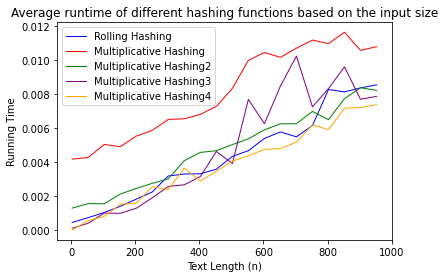

In [418]:
import matplotlib.pyplot as plt
n = 1000
k = 3
step = 50
N = [i for i in range(k, n+1, step)]
rht = rolling_hash_times(n, k, step)
mht = multi_hash_times(n, k, step)
mht2 = multi_hash_times2(n, k, step)
mht3 = multi_hash_times3(n, k, step)
mht4 = multi_hash_times4(n, k, step)
plt.plot(N, rht, color = 'blue', linewidth = 1.0, label="Rolling Hashing")
plt.plot(N, mht, color = 'red', linewidth = 1.0, label="Multiplicative Hashing")
plt.plot(N, mht2, color = 'green', linewidth = 1.0, label="Multiplicative Hashing2")
plt.plot(N, mht3, color = 'purple', linewidth = 1.0, label="Multiplicative Hashing3")
plt.plot(N, mht4, color = 'orange', linewidth = 1.0, label="Multiplicative Hashing4")
plt.legend()
plt.xlabel('Text Length (n)')
plt.ylabel('Running Time')
plt.title('Average runtime of different hashing functions based on the input size')
plt.show()

### Searching

As mentioned in the reading, the division hashing has the time complexity of O(1/(1-a)), where a = n/m, a load factor when n and m are length of the input strings. The first slot will be occupied with a probability of approximately a. If this is actually occupied, we need a second slot which will take a^2. Based on this logic so on,

O(1 + a + a^2 + ... ) ~= O(1/(1-a)) for small enough a. This will be simplified to O(n), which makes the linear behavior.

Based on what Knuth provided, I chose the best c value for the multiplicative hashing; therefore, I assume that the hash table is well distributed. As chaining was used here, some of the entries may include more than one elements. As hash table is big enough, I assume this is evenly distributed, which makes the time complexity O(1+a) because it finds the index and looks into it. This will be simplified to O(1). However, there's other time complexities for computing hash value of each sub string length of k, O(k). Therefore, when I have the input of length n, it will have O(k) * O(n) = O(kn).

### Insertion

Similar to searching, the first implementation has the O(1/(1-a)). To simplify, this will be ending up with O(1) because a is a fraction since m is smaller than q. By using hash tables and double hashing, the table should be evenly distributed and expect that there are not that many collisions, collision resolution is not much necessary for key insertion; the complexity at the end will be O(m) when m is the length of the input string, O(1) * m.

When it comes to multiplicative hashing, similar to searching, it will have O(km), O(k) * O(m). It is because inside of the list the operation happens again due to the chaining resolution I used here. 

### Higher q, how does it matter?

q values of Multiplicative hashing are: MH > MH2 > MH3 > MH4.

As you can see in the graphs below, higher q has longer computing time. It is because when the algorithm generates the hash table, hash table is generated based on the for loop with the q. Of course, making a hash table with for loop takes long enough, which makes O(q). This is why having a larger q takes longer time but still it maintains the linear behavior.

### Conclusion

Based on the analysis above, the first implementation will have O(n) + O(m) = O(n+m) while the second implementation will have O(kn) + O(km) = O(kn+km) = O(k(n+m)). Both are linear behaviors but the first one's time complexity is still smaller than the second one. Therefore, first implementation is preferred in time-wise.

##### Then how are those approach compared to Brute Force?

In [419]:
def bf_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    with brute force on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    
    common_substrings = []
    m = len(x)
    n = len(y)
    for i in range(m - k + 1):
        for j in range(n - k + 1):
            #Iterate through all possible substrings to get all common substrings of x and y
            if x[i:i+k] == y[j:j+k]:
                common_substrings.append((i, j))
    
    #return the list of common substrings
    return common_substrings

In [420]:
def bf_times(n, k, step):
    brute = []
    for i in range(k, n+1, step):
        x = random_input_generator(i)
        times = []
        for j in range(100):
            start = time.time()
            bf_get_match(x, x, k)
            end = time.time()
            times.append(end - start)
        brute.append(sum(times)/len(times))
    return brute

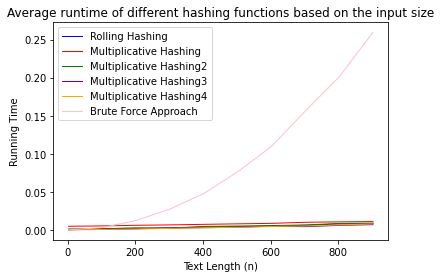

In [421]:
import matplotlib.pyplot as plt
n = 1000
k = 3
step = 100
N = [i for i in range(k, n+1, step)]
rht = rolling_hash_times(n, k, step)
mht = multi_hash_times(n, k, step)
mht2 = multi_hash_times2(n, k, step)
mht3 = multi_hash_times3(n, k, step)
mht4 = multi_hash_times4(n, k, step)
bft = bf_times(n, k, step)
plt.plot(N, rht, color = 'blue', linewidth = 1.0, label="Rolling Hashing")
plt.plot(N, mht, color = 'red', linewidth = 1.0, label="Multiplicative Hashing")
plt.plot(N, mht2, color = 'green', linewidth = 1.0, label="Multiplicative Hashing2")
plt.plot(N, mht3, color = 'purple', linewidth = 1.0, label="Multiplicative Hashing3")
plt.plot(N, mht4, color = 'orange', linewidth = 1.0, label="Multiplicative Hashing4")
plt.plot(N, bft, color = 'pink', linewidth = 1.0, label="Brute Force Approach")
plt.legend()
plt.xlabel('Text Length (n)')
plt.ylabel('Running Time')
plt.title('Average runtime of different hashing functions based on the input size')
plt.show()

All of the hashings are much better than Brute Force, time complexity wise! This graphical analysis proves hashing in general is much better than brute force approach. Brute force may be easy to think as it just compares all sub string by sub string but the thing is this will take dramatic time. Think about the case that you have to string inputs want to test have length of m and n respectively. As it goes through over and over it, it will take O(m*n) However in hash table data structure and hashing, it will take O(m) + O(n) = O(m+n), because it check separately but check the matching after, not likely checking and matching simultaneously like brute force. Plus O(1) for insertion and searching but this is not that critical downside. This makes the behavior still linear but much faster than brute force approach.

## Question 5

#### HC Appendix
##### In this appendix, I discuss the application of HC including successful applications or potential room of improvements.

- #algorithms: I approached this assignment with two different algorithmic approaches. I effectively analyzed each algorithm and explained why the first implementation is preferred. Secondly, all of my codes is professionally written with adaquete docstrings and comments, and work correctly.
- #dataviz: I included a lot of visualizations to discuss the collision behavior, and complexity. I even plotted multiple graphs of different q values of multiplicative hashing together in one graph to show how different value of q affects the time complexity.
- #constraints: Before starting this assignment, I thought of the constraints that I have such as my travel schedule back to the States, and other assignment deadline. That being said, I know my constraints and I know which time that I can work on my final assignment for CS110. This help me to schedule the assignment much ahead of the deadline and distribute my work evenly throughout two weeks.

#### LO Appendix
##### In this appendix, I discuss the application of LO including reflection of LOs has evolved over time.

- #ComplexityAnalysis: To critically apply this LO, I generated graphical and theoretical analysis of the complexities first, second implementations and brute force approach. I even discussed how changing in q will make the algorithm more complex or not. Reflecting this LO, this is the least confident LO that I felt so far throughout the semester because I could not really go deep enough to support my reasonings. Based on the feedbacks that I got from previous assignments, I realized that mathematical approach is necessary to think about the complexity and I did include more mathematical approach in this assignment.

- #ComputationalCritique: Based on the first and second implementation of the algorithms also with the brute force approach, I explicitly explained why the first implementation is preferred over than any other implementations in this assignment. I also explained why having a hash table should be better than just having an array. I learned a lot from this LO in this semester because it helped me to sit down and think about how the algorithms are drawn in my head before I start the hard-coding and structure the code easily.

- #AlgorithmicStrategies: I used OOP by defining classes in this assignment. This helped me to debug the code and work on two different things but combine them later easily. For example, having hash table and considering in node level are two different things but they work together. Dividing them into two classes helped me to focus on one problem when I am working on one at once, but helped me to easily combine them later. Reflecting on this LO, I didn't use any class before this course but realize that differentiating classes is so efficient when it comes to debugging and allow me to keep focused on one thing.

- #DataStructures: I used hash table in this assignment which I have not covered in class or anywhere before. Understanding this LO, I dig in to the benefits of having hash table as a data structure in this assignment and can connect to think about why data structures are critical before the algorithms. Based on the data structure choice, the algorithm that I will implement changes a lot. Learning this LO in this semester, I reflect that rather than thinking about the solution first, make the data prepared and organized before I use them is much more efficient. The relevant phrase here is work smart, not hard.

- #CodeReadability: I properly included all the docstrings and comments so that the one who reads this code can easily follow. Before taking this course, my coding experience was only the level of CS50/51. In those courses, docstring is not required but I tried to explain so many things in comments. Instead, I learned that what are the necessary information in docstring so one can have a general idea, and have concise comments help to read the code flow by flow.

- #PythonProgramming: I effectively used this LO and combined with outside resources like Stackoverflow and TAs. I got code feedback from them and they helped me a lot for debugging. I also included a lot of test cases that are interesting and are on edge to see if my algorithm is working correctly. Reflecting on this LO, coding is not something easy but it requires patience and my passion digging into the problem. This made me a better learner who knows how to actively find the solution and try.

## References

Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms (3rd ed.). Cambridge,
MA: MIT Press. Part VII, sections 32.1 and 32.2.

Ha Nguyen and Quang Tran, “All you need to know about hashing (to build a plagiarism detector)”, revised
October 2021. https://drive.google.com/file/d/1lwkrjRKEm1v8hwqHDYRASqoIKuYJh9iP/view

Knuth, D. E. (1998). The Art of Computer Programming (2nd ed., Vol. 3). Addison-Wesley.

Letter Frequencies per 1000 Words. (n.d.). Trinity College. http://www.cs.trincoll.edu/%7Ecrypto/resources/LetFreq.html